#HW5 - FTIR Simulation

In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

##1
Broadcasting is the term for how numpy treats arrays when doing math. You've already been exposed to broadcasting in previous homeworks. In this question you will learn the concpets involved in broadasting multidimensional arrays. You'll be responsible for knowing how to manipulate arrays in this and future homeworks.

##1a
Read the general broadcasting rules in the [broadcasting documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). Create two three dimensional arrays with different shapes and add them together. You may use [np.zeros](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) to create multidimensonal arrays. Describe how broadcasting works in your own words. Print the shape of the output array, and describe how that shape corresponds to the shape of the original arrays.

##1b
Create some arrays that do not broadcast together. Describe why they do not broadcast in your own words.

#1c
Indexing is how you access a subset of an array. You use square brackets to index. Read the basic [indexing documentation](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html), then complete the following. Indexing in python starts from zero so an array of length n has indicies from 0 to n-1.

In [2]:
arr = np.random.random([8, 9, 10])  # an array of random numbers with shape (8, 9, 10)

# take the zeroeth element in the zeroeth dimension, accessing an array of shape (9, 10)

# take the zeroeth element in all 3 dimensions, accessing a single value

# take the zeroeth element in the first dimension, accessing an array of shape (8, 10)

# expand the dimensionality of the array to (8, 1, 9, 10)


##1d
Take what you learned above and broadcast the two arrays below into a single array with shape (7, 6). Describe what you've done in your own words.

In [15]:
a = np.arange(6)
b = np.arange(7)

(7L, 6L)


##1e
Many numpy methods have optional 'axis' arguments. Describe what I am doing below in your own words.

In [4]:
a = np.zeros([5, 7])
print np.sum(a, axis=0).shape
print np.sum(a, axis=1).shape

(7L,)
(5L,)


##FTIR simulation

The program below simulates the FTIR spectroscopy of a light source with different spectral distributions. Although the simulation is created for you, it is expected that you will examine it in sufficient depth that you will understand it. In fact, you need to change the parameters because the parameter choice is quite poor. You can get much better and clear results for different choices. The questions will help you discover the important insights into how Fourier transforms work.

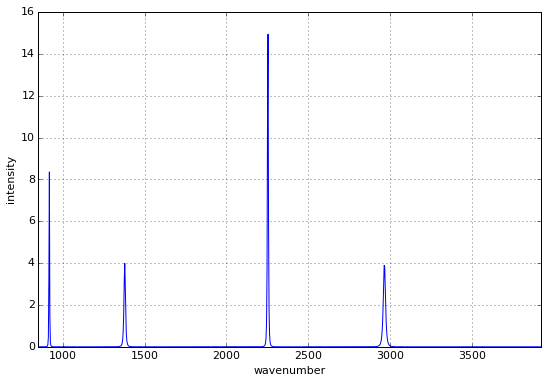

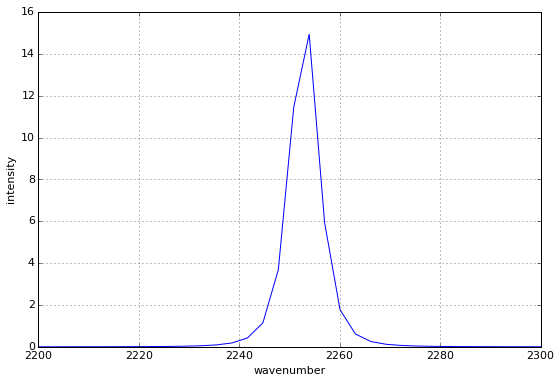

In [5]:
# acetonitrile spectrum simulation

w = np.linspace(850, 3919, 1000)  # wavenumber
k = 2*np.pi*w

# acetonitrile resonance properties
w0 = np.array([917., 1378., 2253., 2965.])  # central frequency
Gamma = np.array([3., 8., 5., 12.])  # dephasing rate
A = np.array([3., 2., 4., 2.])  # amplitude

E = np.sum((A*Gamma**2)/((w0-w[:, None])**2+(Gamma**2)), axis=1)
I = E*np.conj(E)

plt.plot(w, I)
plt.xlim(w.min(), w.max())
plt.grid()
plt.xlabel('wavenumber')
plt.ylabel('intensity')

plt.figure()
plt.plot(w, I)
plt.xlim(2200, 2300)
plt.grid()
plt.xlabel('wavenumber')
plt.ylabel('intensity')

C:\Anaconda\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


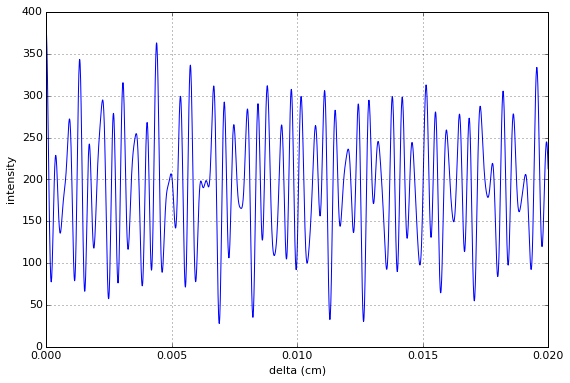

In [6]:
delta = np.linspace(0, 0.02, 2000)  # cm

E_delta = E+E*np.exp(1j*k*delta[:, None])  # (delta, w)

I_delta = E_delta*np.conj(E_delta)
I_net = np.sum(I_delta, axis=1)

plt.plot(delta, I_net)
plt.xlim(delta.min(), delta.max())
plt.grid()
plt.xlabel('delta (cm)')
plt.ylabel('intensity')

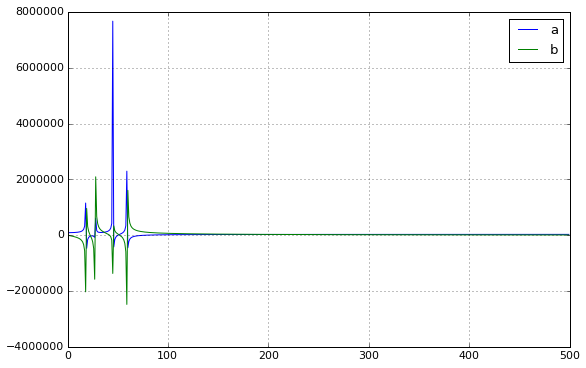

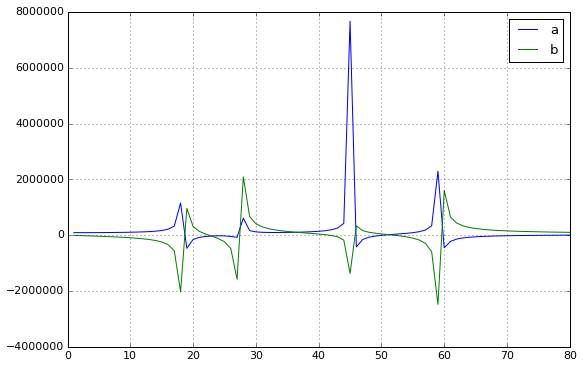

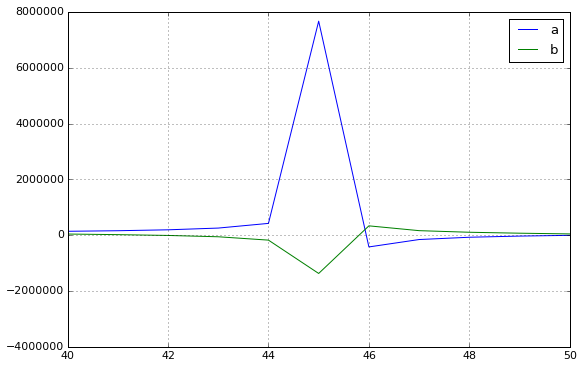

In [7]:
# discrete fourier transform

m = np.arange(1, len(w)/2)

a = (2/delta.max())*np.sum(I_net*np.cos((2*np.pi*m[:, None]*delta)/(delta.max())), axis=1)
b = (2/delta.max())*np.sum(I_net*np.sin((2*np.pi*m[:, None]*delta)/(delta.max())), axis=1)

plt.plot(m, a)
plt.plot(m, b)
plt.grid()
plt.legend(['a', 'b'])

plt.figure()
plt.plot(m, a)
plt.plot(m, b)
plt.xlim(0, 80)
plt.grid()
plt.legend(['a', 'b'])

plt.figure()
plt.plot(m, a)
plt.plot(m, b)
plt.xlim(40, 50)
plt.grid()
plt.legend(['a', 'b'])

##2
For a periodic function with period $T$, a Fourier series is defined as

\begin{equation}\Large
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(nx) + b_n \sin(nx)
\end{equation}

where

\begin{equation}\Large
a_n = \frac{1}{\pi} \int_{0}^{2 \pi} f(x) \cos(nx) \,\, \mathrm{d}x
\end{equation}

and

\begin{equation}\Large
b_n = \frac{1}{\pi} \int_{0}^{2 \pi} f(x) \sin(nx) \,\, \mathrm{d}x
\end{equation}

Note that the definitions for the coefficents define a period from $0$ to $2 \pi$ since this is the longest period for the functions $\cos(nx)$ and $\sin(nx)$. $n$ must be an integer $\geq 1$ What defines the period for this simulation set and what is the period?

##3
There are two sets of spectra on the graph when you do the Fourier series. What do they represent?

##4
Change the x axis in the spectral plots of the Fourier transforms so they read in wavenumber units. Then, compare the measured spectra with the original spectra. You will see the widths of the spectral features are quite different. Why? Do the observed widths from the FTIR agree with what you expect?

##5
Change the parameters in your worksheet so the measurement matches the original spectrum.

##6
The Nyquist criterion is an important concept in Fourier transform methods. Change the parameters so the Nyquest criterion is not met for some lines but is met for other lines. Show that the lines for which the criterion is not met change position.

##7
A transition between two states is described by an exponentially decaying oscillatory function. The following exercise examines the frequency distribution that you would expect, namely a Lorentzian line shape. Graph the function $\sin(2 \pi \nu t) e^{- \Gamma t}$ and its Fourier transform using [numpy's FFT method](http://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft). Assume $\nu = 5\times10^{13} \,\, \mathrm{s}^{-1}$ and $\Gamma = 10^{12} \,\, \mathrm{s}^{-1}$. Use a time period of 0-4 picoseconds for the function. Create two graphs, one that shows the spectrum at all the frequencies and one that expands the scale to show the line shape of the resonance. Show that the width of the line is related to the time constant of the decay by the uncertainty principle. How will things change if $\Gamma = 3\times10^{12} \,\, \mathrm{s}^{-1}$.